<a href="https://colab.research.google.com/github/ehsan94/Deep-Learning/blob/master/Deutschland_COVID19_SHAP_0to75.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Total 106-121

In [1]:
%pip install shap
%matplotlib inline
%pip install catboost

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from matplotlib import rcParams
import shap

from catboost import Pool, CatBoostRegressor

# Data

In [3]:
df = pd.read_stata('W:\COVID19\std_inz106_121.dta')


One or more strings in the dta file could not be decoded using utf-8, and
so the fallback encoding of latin-1 is being used.  This can happen when a file
has been incorrectly encoded by Stata or some other software. You should verify
the string values returned are correct.


In [4]:
df.head()

,D_v404,D_v405,D_v406,D_v423,D_v424,D_v425,D_v442,D_Abhaen,D_Auslae,D_v483,...,G_Pendler_Potsdam,G_latitude,G_longitude,G_distance_Ischgl,Flag100_Pendler_Coesfeld,Flag100_Pendler_Rosenheim,Flag100_Pendler_Goettingen,std_inz_91to106,std_inz_106to121,eastwest
0,46.000000,12.4,-2.5,0.93,2.4,12.3,1.04,38.299999,9.1,3.2,...,0.0,50.549999,7.116667,457.259216,0.0,0.0,0.0,28.917685,9.130560,1.0
1,43.000000,16.0,-3.5,0.94,4.2,7.6,1.00,29.900000,8.0,2.9,...,0.0,48.466667,11.133333,173.721573,0.0,0.0,0.0,93.475174,26.149586,1.0
2,42.500000,14.9,-2.3,0.88,4.0,6.3,0.98,28.900000,12.6,4.0,...,0.0,48.400002,9.983334,156.045456,0.0,0.0,0.0,104.266823,50.689297,1.0
3,49.700001,-1.4,-7.5,0.88,-4.3,-13.3,1.04,50.799999,3.2,2.0,...,0.0,50.983334,12.433333,468.846863,0.0,0.0,0.0,15.950323,17.793818,0.0
4,44.700001,9.4,-1.5,0.93,-0.3,-7.4,1.02,34.099998,7.2,2.1,...,0.0,50.683334,7.650000,451.906799,0.0,0.0,0.0,45.772846,30.634008,1.0


In [5]:
Y = df['std_inz_106to121']
X = df.loc[:, ~df.columns.isin(['std_inz_106to121', 'eastwest'])]

# RF model

In [6]:
rfr = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=5000, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)
rf=rfr.fit(X, Y)  

# R2 RF model

In [7]:
rf.score(X, Y)

0.9359177567693995

# CatBoost Model

In [8]:
# initialize Pool
train_pool = Pool(X,Y)
 

# specify the training parameters 
model = CatBoostRegressor(random_seed=0)
#train the model
cb = model.fit(train_pool)
# make the prediction using the resulting model
preds = model.predict(train_pool)
#print(preds)

Learning rate set to 0.033171
0:	learn: 33.7571766	total: 149ms	remaining: 2m 28s
1:	learn: 33.2970409	total: 155ms	remaining: 1m 17s
2:	learn: 32.9872977	total: 161ms	remaining: 53.6s
3:	learn: 32.6148781	total: 168ms	remaining: 41.8s
4:	learn: 32.2146756	total: 175ms	remaining: 34.8s
5:	learn: 31.9066629	total: 185ms	remaining: 30.7s
6:	learn: 31.5597876	total: 192ms	remaining: 27.2s
7:	learn: 31.2411099	total: 199ms	remaining: 24.7s
8:	learn: 30.9004240	total: 205ms	remaining: 22.6s
9:	learn: 30.5989717	total: 212ms	remaining: 21s
10:	learn: 30.2974113	total: 220ms	remaining: 19.8s
11:	learn: 30.0471775	total: 227ms	remaining: 18.7s
12:	learn: 29.7629678	total: 235ms	remaining: 17.8s
13:	learn: 29.5138009	total: 241ms	remaining: 17s
14:	learn: 29.2292433	total: 249ms	remaining: 16.4s
15:	learn: 28.9149442	total: 256ms	remaining: 15.7s
16:	learn: 28.5977726	total: 264ms	remaining: 15.2s
17:	learn: 28.3531866	total: 270ms	remaining: 14.7s
18:	learn: 28.0831602	total: 277ms	remaining: 

164:	learn: 14.4907607	total: 1.25s	remaining: 6.36s
165:	learn: 14.4407680	total: 1.26s	remaining: 6.34s
166:	learn: 14.4169626	total: 1.27s	remaining: 6.33s
167:	learn: 14.3688411	total: 1.27s	remaining: 6.32s
168:	learn: 14.3275334	total: 1.28s	remaining: 6.3s
169:	learn: 14.2646905	total: 1.29s	remaining: 6.29s
170:	learn: 14.2396837	total: 1.29s	remaining: 6.28s
171:	learn: 14.2054025	total: 1.3s	remaining: 6.27s
172:	learn: 14.1358331	total: 1.31s	remaining: 6.26s
173:	learn: 14.1083842	total: 1.31s	remaining: 6.25s
174:	learn: 14.0628048	total: 1.32s	remaining: 6.23s
175:	learn: 14.0230516	total: 1.33s	remaining: 6.22s
176:	learn: 13.9774817	total: 1.33s	remaining: 6.21s
177:	learn: 13.9263763	total: 1.34s	remaining: 6.19s
178:	learn: 13.8767337	total: 1.35s	remaining: 6.18s
179:	learn: 13.8180043	total: 1.35s	remaining: 6.17s
180:	learn: 13.7629884	total: 1.36s	remaining: 6.16s
181:	learn: 13.7200386	total: 1.37s	remaining: 6.14s
182:	learn: 13.6431913	total: 1.37s	remaining: 6

322:	learn: 8.3456437	total: 2.33s	remaining: 4.88s
323:	learn: 8.3310255	total: 2.34s	remaining: 4.88s
324:	learn: 8.3237575	total: 2.34s	remaining: 4.87s
325:	learn: 8.3148215	total: 2.35s	remaining: 4.86s
326:	learn: 8.2868816	total: 2.35s	remaining: 4.85s
327:	learn: 8.2459806	total: 2.36s	remaining: 4.84s
328:	learn: 8.2198840	total: 2.37s	remaining: 4.83s
329:	learn: 8.1813412	total: 2.38s	remaining: 4.82s
330:	learn: 8.1637809	total: 2.38s	remaining: 4.81s
331:	learn: 8.1582962	total: 2.39s	remaining: 4.8s
332:	learn: 8.1397694	total: 2.39s	remaining: 4.8s
333:	learn: 8.1135019	total: 2.4s	remaining: 4.79s
334:	learn: 8.1020537	total: 2.41s	remaining: 4.78s
335:	learn: 8.0963013	total: 2.42s	remaining: 4.77s
336:	learn: 8.0633920	total: 2.42s	remaining: 4.76s
337:	learn: 8.0376078	total: 2.43s	remaining: 4.76s
338:	learn: 8.0110378	total: 2.44s	remaining: 4.75s
339:	learn: 7.9934763	total: 2.44s	remaining: 4.74s
340:	learn: 7.9741065	total: 2.45s	remaining: 4.73s
341:	learn: 7.9

507:	learn: 4.5858140	total: 3.58s	remaining: 3.47s
508:	learn: 4.5690405	total: 3.59s	remaining: 3.46s
509:	learn: 4.5566649	total: 3.6s	remaining: 3.45s
510:	learn: 4.5376514	total: 3.6s	remaining: 3.45s
511:	learn: 4.5357994	total: 3.61s	remaining: 3.44s
512:	learn: 4.5222530	total: 3.62s	remaining: 3.43s
513:	learn: 4.4999068	total: 3.62s	remaining: 3.42s
514:	learn: 4.4860181	total: 3.63s	remaining: 3.42s
515:	learn: 4.4803714	total: 3.63s	remaining: 3.41s
516:	learn: 4.4534677	total: 3.64s	remaining: 3.4s
517:	learn: 4.4316280	total: 3.65s	remaining: 3.39s
518:	learn: 4.4177396	total: 3.65s	remaining: 3.39s
519:	learn: 4.4016429	total: 3.66s	remaining: 3.38s
520:	learn: 4.3822500	total: 3.67s	remaining: 3.37s
521:	learn: 4.3568108	total: 3.67s	remaining: 3.36s
522:	learn: 4.3509465	total: 3.68s	remaining: 3.36s
523:	learn: 4.3490790	total: 3.69s	remaining: 3.35s
524:	learn: 4.3344775	total: 3.69s	remaining: 3.34s
525:	learn: 4.3135901	total: 3.7s	remaining: 3.33s
526:	learn: 4.30

671:	learn: 2.8072468	total: 4.66s	remaining: 2.27s
672:	learn: 2.8063309	total: 4.67s	remaining: 2.27s
673:	learn: 2.8047744	total: 4.68s	remaining: 2.26s
674:	learn: 2.7992749	total: 4.68s	remaining: 2.25s
675:	learn: 2.7903458	total: 4.69s	remaining: 2.25s
676:	learn: 2.7767515	total: 4.7s	remaining: 2.24s
677:	learn: 2.7703157	total: 4.71s	remaining: 2.23s
678:	learn: 2.7679507	total: 4.71s	remaining: 2.23s
679:	learn: 2.7623718	total: 4.72s	remaining: 2.22s
680:	learn: 2.7615643	total: 4.73s	remaining: 2.21s
681:	learn: 2.7592830	total: 4.74s	remaining: 2.21s
682:	learn: 2.7585332	total: 4.74s	remaining: 2.2s
683:	learn: 2.7521098	total: 4.75s	remaining: 2.19s
684:	learn: 2.7505064	total: 4.76s	remaining: 2.19s
685:	learn: 2.7496825	total: 4.76s	remaining: 2.18s
686:	learn: 2.7398223	total: 4.77s	remaining: 2.17s
687:	learn: 2.7213066	total: 4.78s	remaining: 2.17s
688:	learn: 2.7069650	total: 4.79s	remaining: 2.16s
689:	learn: 2.7050303	total: 4.79s	remaining: 2.15s
690:	learn: 2.

857:	learn: 1.6188454	total: 5.91s	remaining: 978ms
858:	learn: 1.6119409	total: 5.91s	remaining: 971ms
859:	learn: 1.6044301	total: 5.92s	remaining: 964ms
860:	learn: 1.5960095	total: 5.93s	remaining: 957ms
861:	learn: 1.5901810	total: 5.93s	remaining: 950ms
862:	learn: 1.5872491	total: 5.94s	remaining: 943ms
863:	learn: 1.5843301	total: 5.95s	remaining: 936ms
864:	learn: 1.5777714	total: 5.95s	remaining: 929ms
865:	learn: 1.5737200	total: 5.96s	remaining: 922ms
866:	learn: 1.5712100	total: 5.96s	remaining: 915ms
867:	learn: 1.5658730	total: 5.97s	remaining: 908ms
868:	learn: 1.5598179	total: 5.98s	remaining: 901ms
869:	learn: 1.5574709	total: 5.98s	remaining: 894ms
870:	learn: 1.5532030	total: 5.99s	remaining: 887ms
871:	learn: 1.5490668	total: 6s	remaining: 880ms
872:	learn: 1.5437655	total: 6s	remaining: 873ms
873:	learn: 1.5434968	total: 6.01s	remaining: 866ms
874:	learn: 1.5404073	total: 6.01s	remaining: 859ms
875:	learn: 1.5351683	total: 6.02s	remaining: 852ms
876:	learn: 1.5320

# R2 CatBoost

In [9]:
cb.score(X, Y)

0.9990659721495803

# SHAP values 

# RF

In [10]:
shap_values = shap.TreeExplainer(rf).shap_values(X)

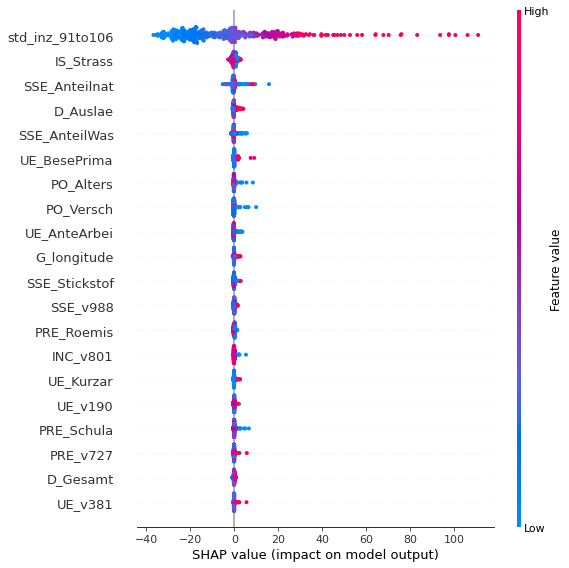

In [11]:
shap.summary_plot(shap_values, X,max_display=20) 

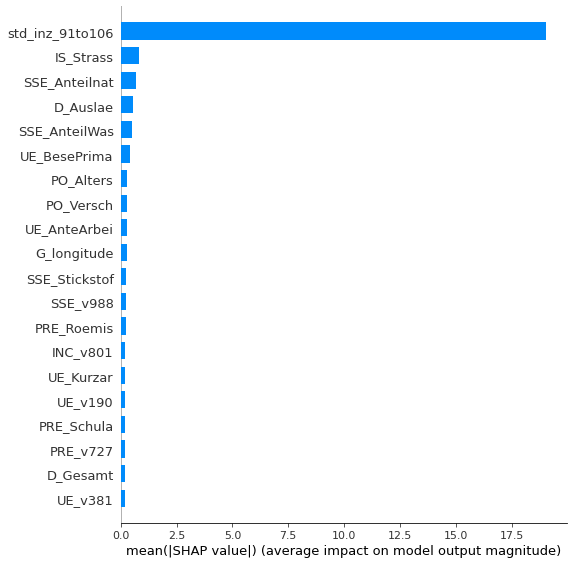

In [12]:
shap.summary_plot(shap_values, X, plot_type="bar",max_display=20)

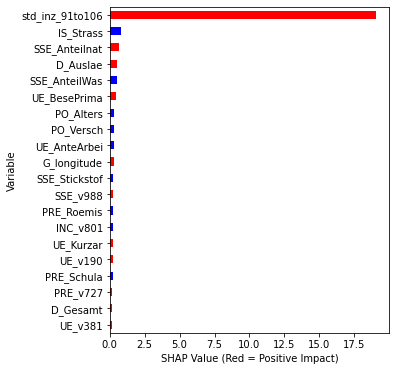

In [13]:
def ABS_SHAP(df_shap,df):
    #import matplotlib as plt
    # Make a copy of the input data
    shap_v = pd.DataFrame(df_shap)
    feature_list = df.columns
    shap_v.columns = feature_list
    df_v = df.copy().reset_index().drop('index',axis=1)
    
    # Determine the correlation in order to plot with different colors
    corr_list = list()
    for i in feature_list:
        b = np.corrcoef(shap_v[i],df_v[i])[1][0]
        corr_list.append(b)
    corr_df = pd.concat([pd.Series(feature_list),pd.Series(corr_list)],axis=1).fillna(0)
    # Make a data frame. Column 1 is the feature, and Column 2 is the correlation coefficient
    corr_df.columns  = ['Variable','Corr']
    corr_df['Sign'] = np.where(corr_df['Corr']>0,'red','blue')
    
    # Plot it
    shap_abs = np.abs(shap_v)
    k=pd.DataFrame(shap_abs.mean()).reset_index()
    k.columns = ['Variable','SHAP_abs']
    k2 = k.merge(corr_df,left_on = 'Variable',right_on='Variable',how='inner')
    k2 = k2.sort_values(by='SHAP_abs',ascending = True)
    k2 = k2[-20:]
    colorlist = k2['Sign']
    ax = k2.plot.barh(x='Variable',y='SHAP_abs',color = colorlist, figsize=(5,6),legend=False)
    ax.set_xlabel("SHAP Value (Red = Positive Impact)")
    
ABS_SHAP(shap_values,X) 

# CatBoost

In [14]:
shap_values_cb = shap.TreeExplainer(cb).shap_values(X)

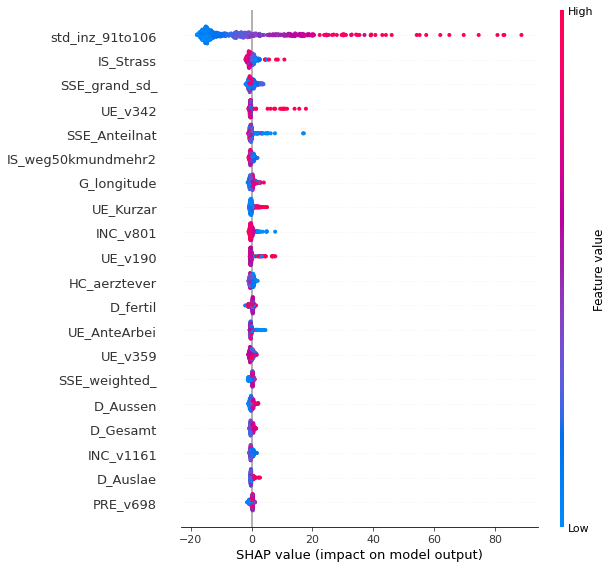

In [15]:
shap.summary_plot(shap_values_cb, X,max_display=20)  #TreeExpliner

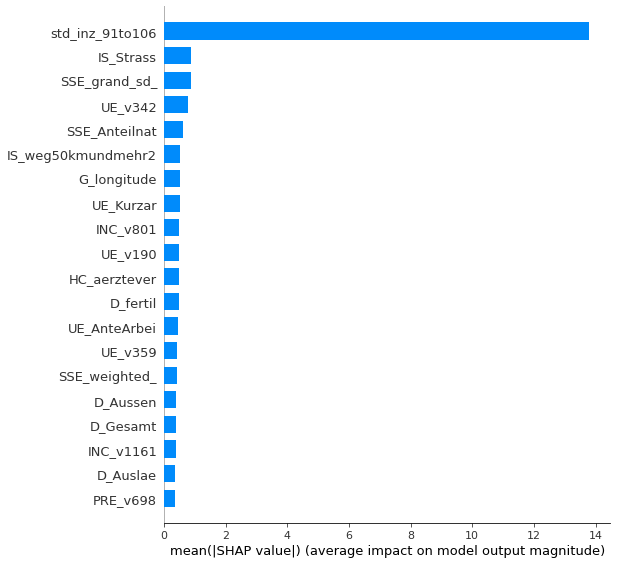

In [16]:
shap.summary_plot(shap_values_cb, X, plot_type="bar",max_display=20)

invalid value encountered in true_divide
invalid value encountered in true_divide


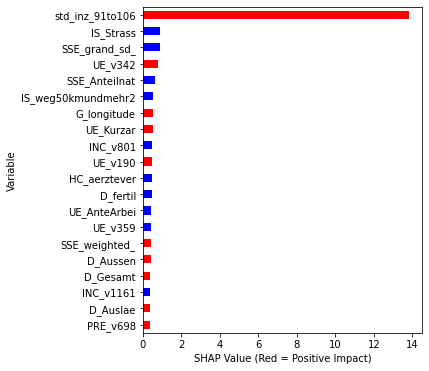

In [17]:
def ABS_SHAP(df_shap,df):
    #import matplotlib as plt
    # Make a copy of the input data
    shap_v = pd.DataFrame(df_shap)
    feature_list = df.columns
    shap_v.columns = feature_list
    df_v = df.copy().reset_index().drop('index',axis=1)
    
    # Determine the correlation in order to plot with different colors
    corr_list = list()
    for i in feature_list:
        b = np.corrcoef(shap_v[i],df_v[i])[1][0]
        corr_list.append(b)
    corr_df = pd.concat([pd.Series(feature_list),pd.Series(corr_list)],axis=1).fillna(0)
    # Make a data frame. Column 1 is the feature, and Column 2 is the correlation coefficient
    corr_df.columns  = ['Variable','Corr']
    corr_df['Sign'] = np.where(corr_df['Corr']>0,'red','blue')
    
    # Plot it
    shap_abs = np.abs(shap_v)
    k=pd.DataFrame(shap_abs.mean()).reset_index()
    k.columns = ['Variable','SHAP_abs']
    k2 = k.merge(corr_df,left_on = 'Variable',right_on='Variable',how='inner')
    k2 = k2.sort_values(by='SHAP_abs',ascending = True)
    k2 = k2[-20:]
    colorlist = k2['Sign']
    ax = k2.plot.barh(x='Variable',y='SHAP_abs',color = colorlist, figsize=(5,6),legend=False)
    ax.set_xlabel("SHAP Value (Red = Positive Impact)")
    
ABS_SHAP(shap_values_cb,X) 